<a href="https://colab.research.google.com/github/rabiaozdemir/Transfer_Learning/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Input,Concatenate,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from keras import backend as K
import pandas as pd
import numpy as np
from keras import layers
from keras.models import load_model, model_from_json
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import os
from pathlib import Path
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D

from tensorflow.keras.applications import ResNet50,Xception

from keras.utils import np_utils




from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization,Activation,Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
train_path="./drive/MyDrive/chest_xray/train"
test_path="./drive/MyDrive/chest_xray/test"

trainDataGen=ImageDataGenerator(rescale=1./255, validation_split=0.1)
testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    subset="training"
    )

valGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

testGen=testDataGen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=1,
    )

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [4]:
base_model=tf.keras.applications.InceptionV3( include_top=False,
                                               weights='imagenet',
                                             input_shape=(224,224,3)  
)
base_model.trainable=False
x = Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x) 
x = Dense(128, activation='relu')(x) 
out=Dense(3,activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=out, name='Xception')

print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 1s 0us/step
315
input_1   False
conv2d   False
batch_normalization   False
activation   False
conv2d_1   False
batch_normalization_1   False
activation_1   False
conv2d_2   False
batch_normalization_2   False
activation_2   False
max_pooling2d   False
conv2d_3   False
batch_normalization_3   False
activation_3   False
conv2d_4   False
batch_normalization_4   False
activation_4   False
max_pooling2d_1   False
conv2d_8   False
batch_normalization_8   False
activation_8   False
conv2d_6   False
conv2d_9   False
batch_normalization_6   False
batch_normalization_9   False
activation_6   False
activation_9   False
average_pooling2d   False
conv2d_5   False
conv2d_7   False
conv2d_10   False
conv2d_11   False
batch_normalization_5   False
batch_normalization_7   False
batch_normalization_10   False
batch_normalization_11   False
activation_5   False
activation_7   False

In [5]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=model.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//128,
    validation_data=valGen,
    epochs=5,
    validation_steps=valGen.samples//128
    
)

Epoch 1/5
36/36 [==============================] - ETA: 0s - batch: 17.5000 - size: 32.0000 - loss: 0.8808 - accuracy: 0.5799 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


36/36 [==============================] - 635s 17s/step - batch: 17.5000 - size: 32.0000 - loss: 0.8808 - accuracy: 0.5799 - val_loss: 1.2059 - val_accuracy: 0.5156
Epoch 2/5
36/36 [==============================] - 510s 14s/step - batch: 17.5000 - size: 32.0000 - loss: 0.7232 - accuracy: 0.6693 - val_loss: 1.1832 - val_accuracy: 0.5000
Epoch 3/5
36/36 [==============================] - 566s 16s/step - batch: 17.5000 - size: 32.0000 - loss: 0.6807 - accuracy: 0.6944 - val_loss: 1.2908 - val_accuracy: 0.5391
Epoch 4/5
36/36 [==============================] - 547s 16s/step - batch: 17.5000 - size: 31.3056 - loss: 0.6733 - accuracy: 0.7054 - val_loss: 0.8198 - val_accuracy: 0.6406
Epoch 5/5
36/36 [==============================] - 175s 5s/step - batch: 17.5000 - size: 32.0000 - loss: 0.5834 - accuracy: 0.7457 - val_loss: 1.4190 - val_accuracy: 0.4141


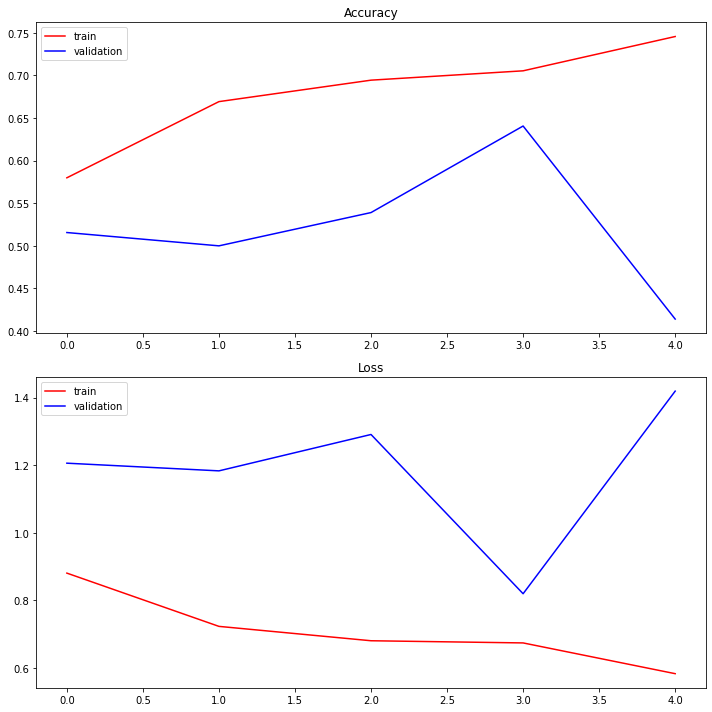

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [7]:
#CONFUSİON MATRİX ÇİZDİRME
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(testGen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testGen.classes, y_pred)
print(cm)

print('Classification Report')
print(classification_report(testGen.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1307: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Confusion Matrix
[[  2  16 219]
 [  2  15 217]
 [  3   8 142]]
Classification Report
              precision    recall  f1-score   support

           0       0.29      0.01      0.02       237
           1       0.38      0.06      0.11       234
           2       0.25      0.93      0.39       153

    accuracy                           0.25       624
   macro avg       0.31      0.33      0.17       624
weighted avg       0.31      0.25      0.14       624



{'BACTERIA': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)


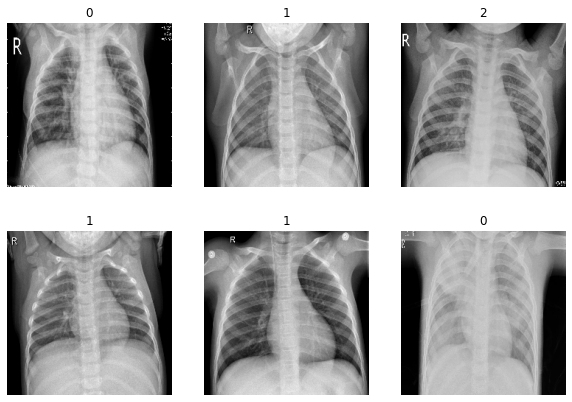

In [8]:
print (trainGen.class_indices)
plt.figure(figsize=(10,7))
for i in range(6):
 img,y=trainGen.next()
 print(img.shape)
 print(y.shape)
 plt.subplot(2,3,i+1)
 plt.title(list(y[:3][0]).index(1))
 plt.axis('off')
 plt.imshow(img[0])

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=np.argmax(model.predict(testGen), axis=1)
print('Confusion Matrix')
print(confusion_matrix(testGen.classes,y_pred))

Confusion Matrix
[[  3  14 220]
 [  3  21 210]
 [  1   4 148]]


In [11]:
print('Classification Report')
target_names=['bacteria_pneumonia', 'normal', 'virus_pneumonia']
print(classification_report(testGen.classes, y_pred, target_names=target_names))

Classification Report
                    precision    recall  f1-score   support

bacteria_pneumonia       0.43      0.01      0.02       237
            normal       0.54      0.09      0.15       234
   virus_pneumonia       0.26      0.97      0.40       153

          accuracy                           0.28       624
         macro avg       0.41      0.36      0.19       624
      weighted avg       0.43      0.28      0.17       624

